
# Recognizing hand-written digits


An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the
:ref:`tutorial section of the user manual <introduction>`.



In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn import cross_validation

/home/chhavi/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


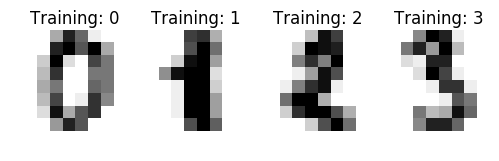

In [2]:
# The digits dataset
digits = datasets.load_digits()


# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [10]:

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
print(digits.images.shape)
data = digits.images.reshape((n_samples, -1))
data.shape

(1797, 8, 8)


(1797, 64)

In [22]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(kernel = 'linear',gamma=0.05, C = 5)

# We learn the digits on the first half of the digits
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(data, digits.target, test_size = 0.2)
#classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])
classifier.fit(X_train, Y_train)
# Now predict the value of the digit on the second half:
expected = Y_test
predicted = classifier.predict(X_test)


In [23]:
print(classifier.score(X_test, Y_test))
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

0.980555555556
Classification report for classifier SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.05, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       1.00      0.96      0.98        27
          2       1.00      1.00      1.00        36
          3       0.94      0.94      0.94        36
          4       1.00      1.00      1.00        30
          5       0.98      1.00      0.99        42
          6       1.00      1.00      1.00        39
          7       0.98      1.00      0.99        40
          8       0.97      0.91      0.94        35
          9       0.95      0.97      0.96        38

avg / total       0.98      0.98      0.98       360


Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  1]


In [26]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(kernel = 'rbf')

# We learn the digits on the first half of the digits
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(data, digits.target, test_size = 0.2)
#classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])
classifier.fit(X_train, Y_train)
# Now predict the value of the digit on the second half:
expected = Y_test
predicted = classifier.predict(X_test)


In [27]:
print(classifier.score(X_test, Y_test))
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

0.5
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.57      0.73        40
          1       1.00      0.59      0.74        29
          2       0.13      1.00      0.23        27
          3       1.00      0.65      0.79        37
          4       1.00      0.41      0.58        37
          5       1.00      0.70      0.83        37
          6       1.00      0.53      0.69        36
          7       1.00      0.45      0.62        33
          8       1.00      0.02      0.04        44
          9       1.00      0.33      0.49        40

avg / total       0.93      0.50      0.57       360


Confusion matrix:
[[23  0 17  0  0  0  0  0  0  0]
 [ 0 17 12  0  0  0  0  0  0  0]
 [ 0  0 27

In [28]:
from sklearn import ensemble
RFC = ensemble.RandomForestClassifier()

In [30]:
RFC.fit(X_train, Y_train)
#RFC.score(X_test, Y_test)
expected = Y_test
predicted = RFC.predict(X_test)

In [31]:
print(RFC.score(X_test, Y_test))
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

0.955555555556
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.95      1.00      0.98        40
          1       0.88      0.97      0.92        29
          2       0.96      1.00      0.98        27
          3       1.00      0.92      0.96        37
          4       1.00      0.97      0.99        37
          5       0.88      1.00      0.94        37
          6       0.97      0.97      0.97        36
          7       0.97      0.97      0.97        33
          8       0.97      0.86      0.92        44
          9       0.97      0.93      0.95        40

avg / total       0.96      0.96      0.96       360


Confusion matrix:
[[40  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  1  0]

In [ ]:
#Repeat with KNN classifer as well. 

In [ ]:

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()